In [172]:
#Die ganzen packages die für den versuch verwendet werden

import numpy as np #numpy ist ein package mit allen mathematischen ausdrücken/funktionen/operationen/etc. 
from uncertainties import ufloat #Uncertainties ist für das automatische berrechnen von unsicherheiten
from uncertainties.umath import * #Importieren von rechnen mit uncertainties (addition/multiplikation/etc.)
from uncertainties import unumpy as unp #kann arrays von unsicherheiten verstehen (also eine liste, statt jede zahl einzeln einzutippen)
from IPython.display import Latex, HTML, Math, display # Um ergebnisse schöner anzuzeigen. display() "ersetzt" quasi print(), und lässt latex fromatierung zu
import matplotlib.pyplot as plt #Damit kann man graphen plotten
from scipy.optimize import curve_fit
from scipy.stats import linregress

import pandas as pd #Um die Spektroskopie daten zu lesen
from scipy.signal import find_peaks #um die maxima von listen (also auch y-achse) zu finden

# Wechselstromspannung

In diesem Experiment werden frequenzabhängige Wechselstromwiderstände sowie die Resonanzkurve eines Serienschwingkreises untersucht. Durch geeignete Fit-Funktionen werden die Parameter $C$, $L$, $\omega_0$ und $\delta$ bestimmt.

## Bestimmung des Kapazitiven Wechselstromwiderstands


### Durchführung und Versuchsaufbau

Ein Funktionsgenerator erzeugt eine sinusförmige Wechselspannung von etwa $1\,\text{V}$, die an eine Serienschaltung aus einem bekannten Ohm’schen Widerstand $R$ und einem Kondensator $C$ gelegt wird.  
Mit zwei Digitalmultimetern werden die Effektivspannungen $U_R$ und $U_C$ im Frequenzbereich von $500\,\text{Hz}$ bis $2500\,\text{Hz}$ gemessen.

Der kapazitive Wechselstromwiderstand ergibt sich zu:

$$
X_C = R \cdot \frac{U_C}{U_R}
$$

Die Werte werden als Funktion der Kreisfrequenz $\omega = 2\pi\nu$ dargestellt.  
Zur Bestimmung der Kapazität C wird folgende Funktion gefittet:

$$
X_C(\omega) = \frac{1}{\omega C}
$$


### Unsicherheiten der Messgeräte

* Digitalmultimeter AC-Spannung: ±(0.8 % + 3 Digits)  
* Widerstandsmessung für $R$: 

### Systematische Unsicherheiten

Innenwiderstände beeinflussen die Spannungsmessungen.

## Bestimmung des induktiven Wechselstromwiderstands

### Durchführung und Versuchsaufbau

Der Kondensator wird durch eine Spule ersetzt. Im selben Frequenzbereich werden die Spannungen $U_R$ und $U_L$ gemessen.  
Der induktive Widerstand ergibt sich zu:

$$
X_L = R \cdot \frac{U_L}{U_R}
$$

Zur Bestimmung der Induktivität L wird folgender Fit benutzt:

$$
X_L(\omega) = \omega L
$$


### Unsicherheiten der Messgeräte

Analog zum Kapazitätsversuch.  

### Systematische Unsicherheiten

Der Spulenwiderstand führt zu systematischen Abweichungen besonders bei niedrigen Frequenzen.  

## Resonanzkurve des Serienschwingkreises

### Durchführung und Versuchsaufbau

Die Bauteile $R$, $C$ und $L$ werden in Serie geschaltet. Der Funktionsgenerator liefert ca. $1\,\text{V}$.  
Für Frequenzen zwischen $500\,\text{Hz}$ und $2500\,\text{Hz}$ werden die Spannungen:

* $U_0(\omega)$: Gesamtspannung  
* $U_C(\omega)$: Spannung am Kondensator  

gemessen.

Die Resonanzkurve wird nach Gleichung (17) gefittet:

$$
U_C(\omega)=\frac{U_{0,0}\,\omega_0^2}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\delta^2\omega^2}}
$$

mit folgenden Parametern:

* $\omega_0$ — Eigenkreisfrequenz  
* $\delta$ — Dämpfungskonstante  

### Unsicherheiten der Messgeräte

* Digitalmultimeter AC-Spannungsmessung: ±(0.8 % + 3 Digits)  

### Systematische Unsicherheiten

Die reale Dämpfung enthält Beiträge des Innenwiderstands des Generators sowie des ohmschen Widerstands der Spule.  
Eine unzureichende Messpunktdichte im Resonanzmaximum kann den Fit beeinträchtigen.


## Ergebnisse:



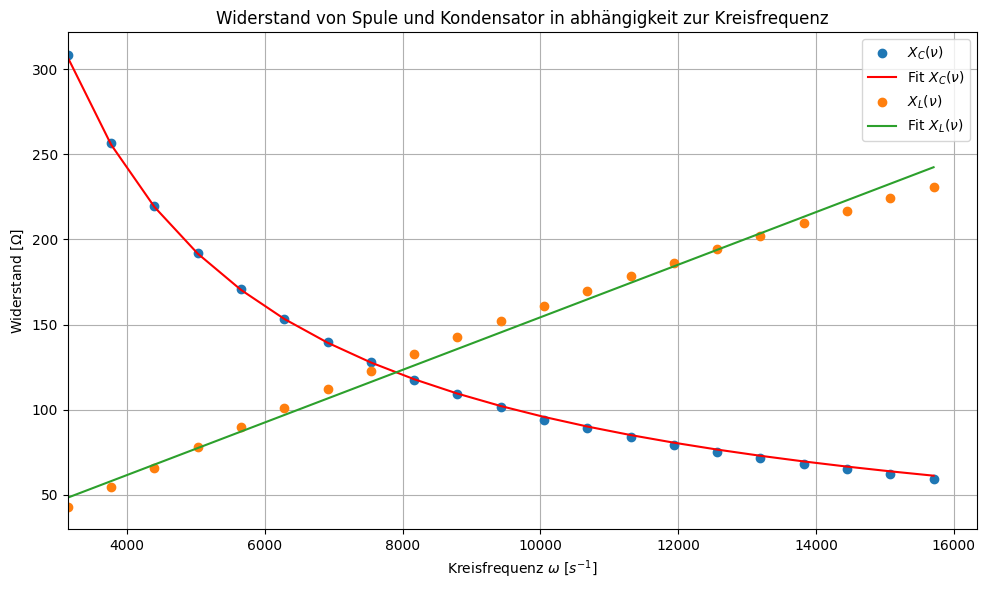

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

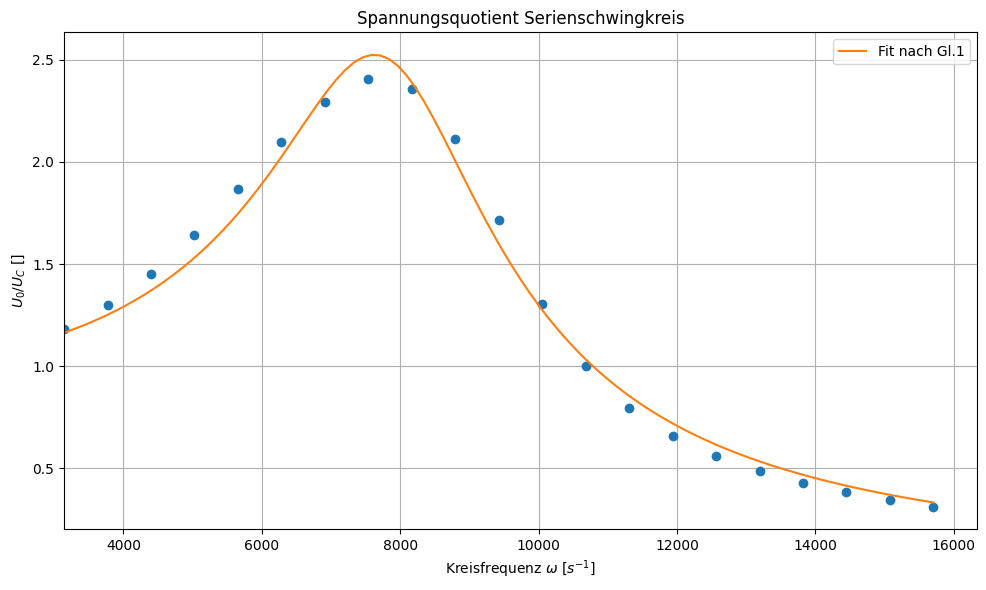

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [208]:
#Ohmscher Widerstand:
R = 25.7

#Spannnungen für funktionsgenerator 1.002
U_Rc = np.array([83.2, 98.6, 113.3, 127.4, 140.8, 153.5, 165.4, 176.6, 187.3, 197.1, 206.4, 215.0, 223.0, 230.5, 237.4, 243.9, 249.9, 255.4, 260.6, 265.4, 269.9])*1e-3 #mV
U_C = np.array([0.998, 0.984, 0.969, 0.953, 0.936, 0.917, 0.898, 0.878, 0.857, 0.837, 0.816, 0.786, 0.775, 0.755, 0.735, 0.716, 0.697, 0.678, 0.660, 0.642, 0.625]) #V


U_Rl = np.array([270.6, 252.3, 234.7, 218.1, 203.0, 189.7, 177.9, 167.7, 158.8, 150.9, 143.9, 137.7, 132.0, 126.8, 122.2, 117.9, 114.0, 110.3, 106.9, 103.7, 100.8])*1e-3 #mV
U_L = np.array([0.455, 0.534, 0.603, 0.661, 0.709, 0.747, 0.778, 0.802, 0.822, 0.838, 0.851, 0.863, 0.872, 0.880, 0.886, 0.892, 0.896, 0.900, 0.902, 0.905, 0.906]) #V


f = np.array([500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500])

w = f * np.pi *2

#Kondensator
X_C = R * (U_C/U_Rc)
#X_C = np.array([313.2, 259.4, 222.1, 193.3, 172.4, 155.8, 140.8, 129.1, 119.5, 111.3, 103.8, 96.9, 91.4, 86.3, 81.8, 77.7, 74.1, 70.7, 67.6, 64.6, 62.1])
#Spule
X_L = R * (U_L/U_Rl)
#X_L = np.array([42.5, 52.9, 64.1, 75.5, 86.3, 97.5, 108.1, 118.8, 128.5, 138.7, 147.7, 157.2, 166.1, 175.3, 184.0, 193.0, 202.5, 210.8, 219.4, 228.7, 236.1])


def XC(w,C):
    return 1/(w*C)
slope_C, pcov = curve_fit(XC, w, X_C)
resc = np.sqrt(np.diag(pcov))

def XL(w,L):
    return (w*L)
slope_L, pcov = curve_fit(XL, w, X_L)
resl = np.sqrt(np.diag(pcov))

C_fit = slope_C[0]
C_err = resc[0]

L_fit = slope_L[0]
L_err = resl[0]


n = "\n"

plt.figure(figsize=(10, 6))
# Kondensator
plt.plot(w,X_C, "o", label=r"$X_C(\nu)$")
plt.plot(w, XC(w, C_fit), 'r-',label=rf"Fit $X_C(\nu)$")


#Spule
plt.plot(w,X_L, "o", label=r"$X_L(\nu)$")
plt.plot(w, XL(w, L_fit), label=rf"Fit $X_L(\nu)$")

plt.ylabel(r"Widerstand $[\Omega]$")
plt.xlabel(r"Kreisfrequenz $\omega~[s^{{-1}}]$")
plt.legend()
plt.title("Widerstand von Spule und Kondensator in abhängigkeit zur Kreisfrequenz")
plt.tight_layout()
plt.grid()
plt.xlim(left=min(w))
plt.show()

display(Latex(fr"$$C = ({C_fit*1e6:.3f}\pm{C_err*1e6:.3f}) ~\mathrm{{\mu F}}$$"))
display(Latex(fr"$$L = ({L_fit*1e3:.2f}\pm{L_err*1e3:.2f}) ~\mathrm{{mH}}$$"))



f = np.array([500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500])

U0 = np.array([0.988, 0.954, 0.903, 0.835, 0.755, 0.675, 0.607, 0.557, 0.533, 0.538, 0.579, 0.644, 0.710, 0.761, 0.798, 0.825, 0.845, 0.860, 0.872, 0.881, 0.888]) #V
UC = np.array([1.168, 1.239, 1.312, 1.372, 1.408, 1.415, 1.393, 1.340, 1.255, 1.137, 0.992, 0.841, 0.709, 0.606, 0.527, 0.464, 0.413, 0.370, 0.335, 0.304, 0.278]) #V

w = 2 * np.pi * f

# fit funktion
def quotient(w, w_0, delta):
    return (w_0**2) / np.sqrt((w_0**2 - w**2)**2 + 4*(delta**2)*(w**2))

p0= [128.143485, 10]

res, pcov = curve_fit(quotient, w, UC/U0, p0=p0)

w0_fit, delta_fit = res
w0_err, delta_err = np.sqrt(np.diag(pcov))


w_fit = np.linspace(min(w),max(w),100)

plt.figure(figsize=(10, 6))
plt.plot(w, UC/U0, "o")
plt.plot(w_fit,quotient(w_fit, w0_fit, delta_fit), "-", label="Fit nach Gl.1")
plt.ylabel(r"$U_0/U_C$ $[]$")
plt.xlabel(r"Kreisfrequenz $\omega~[s^{{-1}}]$")
plt.legend()
plt.title("Spannungsquotient Serienschwingkreis")
plt.tight_layout()
plt.xlim(left=min(w))
plt.grid()
plt.show()

display(Latex(fr"$$\omega_0 = ({w0_fit:.0f}\pm{w0_err:.0f}) ~\mathrm{{s}}^{{-1}}$$"))

display(Latex(fr"$$\delta = ({delta_fit:.0f} \pm {delta_err:.0f})~\mathrm{{s}}^{{-1}}$$"))

R = ufloat(delta_fit,delta_err)*2*ufloat(L_fit,L_err)

display(Latex(fr"$$R = ({unp.nominal_values(R):.1f} \pm {unp.std_devs(R):.1f})~\Omega$$"))

R_g = ufloat(25.7, 25.7*0.015+0.1)

display(Latex(fr"$$R_{{gemessen}} = ({unp.nominal_values(R_g):.1f} \pm {unp.std_devs(R_g):.1f})~\Omega$$"))


## Diskussion

### Kapazitiver und Induktiver Widerstand

Bei beiden Widerständen ist der Fit passend und lässt somit vermuten, dass auch die Werte für C und L mit der Theorie Übereinstimmen. Bezüglich Unsicherheit ergibt sich für beide Werte eine relative Unsicherheit von weniger als 1%, was sich nur aus dem Fit ergibt. Die wirkliche Unsicherheit ist wahrscheinlich größer, da diese ohne Fehlerfortpflanzung der Unsicherheit der Messgeräte und Bauteile bestimmt wurde.


### Resonanzkurve des Serienschwingkreis

Man erkennt, dass das Verhältnis der Spannung zuerst steigt und daraufhin wieder fällt, desto höher die Frequenz eingestellt wird. Dieses verhalten ist zu erwarten, da der Wurzelterm aus der Gleichung nach dem Maximum die Überhand gewinnt. Dementsprechend ist das Resultat den Erwartungen entsprechend. 

Der gemessen Widerstand und somit die Dämpfung ist niedriger als der Tatsächlich berrechnete, was an Energie verlusten in der Spule, Kondensator und INnenwiderständen liegen kann, welche zusammen auf das doppelte vom tatsächlichen widerstand Führen.

## Anhang:

In [209]:

table = r"""$$
\begin{array}{c|c|c|c|c|c} 
U_{Rc} ~[\mathrm{V}] & U_C~[\mathrm{V}] & U_{Rl}~[\mathrm{V}] & U_L~[\mathrm{V}] & f~[\mathrm{Hz}] & \omega~[\mathrm{rad/s}] \\ \hline
"""

for i, (urc, uc, ulc, ul, fi, wi) in enumerate(zip(U_Rc, U_C, U_Rl, U_L, f, w)):
    table += rf"{urc:.3f} & {uc} & {ulc:.3f} & {ul} & {fi} & {wi:.2f} \\ "

table += r"\end{array}$$"

display(Latex(table))


table = r"""$$
\begin{array}{c|c|c} 
U_0 ~[\mathrm{V}] & U_C~[\mathrm{V}] & f~[\mathrm{1/s}] \\ \hline
"""

for i, (u0, uc, fq) in enumerate(zip(U0, UC, f)):
    table += rf"{u0} & {uc} & {fq:.2f} \\ "

table += r"\end{array}$$"

display(Latex(table))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>